In [ ]:
#INF2178 CODe

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [ ]:
# Mount file to google drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
# Load the dataframe
df=pd.read_excel('/drive/My Drive/Colab Notebooks/INF2178_A1_data.xlsx')

In [ ]:
# Convert OCCUPANCY_DATE to datetime format
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

In [ ]:
# Extract month from OCCUPANCY_DATE for seasonal analysis
df['MONTH'] = df['OCCUPANCY_DATE'].dt.month

In [ ]:
# Define a function to calculate capacity rate
def calculate_capacity_rate(row):
    if pd.notnull(row['CAPACITY_ACTUAL_ROOM']) and pd.notnull(row['OCCUPIED_ROOMS']):
        return row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM']
    elif pd.notnull(row['CAPACITY_ACTUAL_BED']) and pd.notnull(row['OCCUPIED_BEDS']):
        return row['OCCUPIED_BEDS'] / row['CAPACITY_ACTUAL_BED']
    else:
        return np.nan

In [ ]:
# Apply the function to calculate capacity rate
df['CAPACITY_RATE'] = df.apply(calculate_capacity_rate, axis=1)

In [ ]:
# Filter the dataset for winter and summer months
winter_months = [12, 1, 2]
summer_months = [6, 7, 8]
winter_data = df[df['MONTH'].isin(winter_months)]
summer_data = df[df['MONTH'].isin(summer_months)]

In [ ]:
# Calculate average capacity rate for winter and summer
winter_avg_capacity_rate = winter_data['CAPACITY_RATE'].mean()
summer_avg_capacity_rate = summer_data['CAPACITY_RATE'].mean()

print(f"Average winter capacity rate: {winter_avg_capacity_rate}")
print(f"Average summer capacity rate: {summer_avg_capacity_rate}")

Average winter capacity rate: 0.9386143101948013
Average summer capacity rate: 0.9140473971403169


In [ ]:
# Perform t-test between winter and summer capacity rates
t_stat, p_value = ttest_ind(winter_data['CAPACITY_RATE'].dropna(), summer_data['CAPACITY_RATE'].dropna())

In [ ]:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 13.732150632203751, P-value: 9.256519912333895e-43


In [ ]:
# Ensure the DataFrame
df.dropna(subset=['CAPACITY_RATE'], inplace=True)

In [ ]:
# Classifying 'SEASON'
df['SEASON'] = df['MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Summer' if x in [6, 7, 8] else 'Other'))

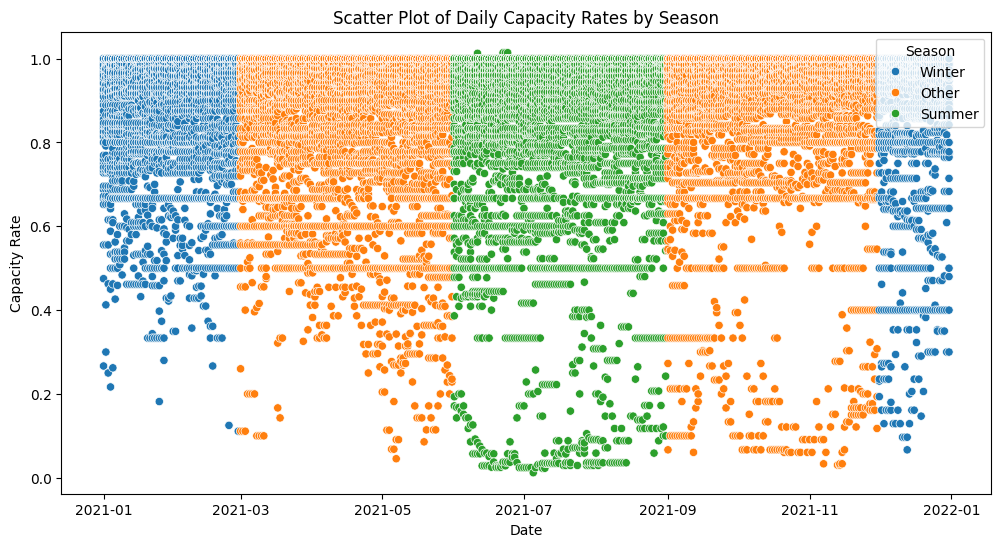

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='OCCUPANCY_DATE', y='CAPACITY_RATE', hue='SEASON')
plt.title('Scatter Plot of Daily Capacity Rates by Season')
plt.xlabel('Date')
plt.ylabel('Capacity Rate')
plt.legend(title='Season', loc='upper right')
plt.show()

In [ ]:
# Filtering for CAPACITY_RATE at 0.5 and below
df_filtered = df[df['CAPACITY_RATE'] <= 0.5]


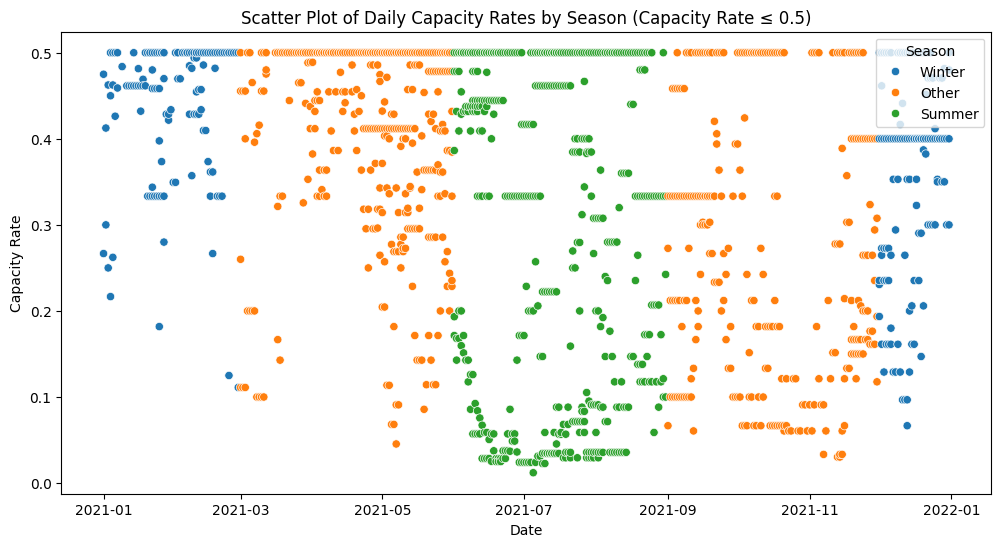

In [ ]:
# Plotting the filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='OCCUPANCY_DATE', y='CAPACITY_RATE', hue='SEASON')
plt.title('Scatter Plot of Daily Capacity Rates by Season (Capacity Rate ≤ 0.5)')
plt.xlabel('Date')
plt.ylabel('Capacity Rate')
plt.legend(title='Season', loc='upper right')
plt.show()

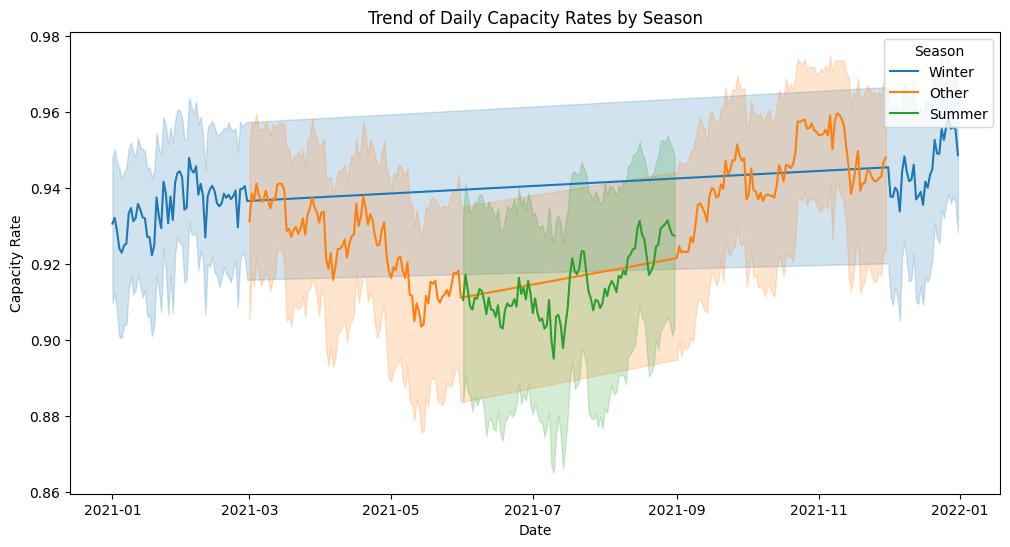

In [ ]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='OCCUPANCY_DATE', y='CAPACITY_RATE', hue='SEASON')
plt.title('Trend of Daily Capacity Rates by Season')
plt.xlabel('Date')
plt.ylabel('Capacity Rate')
plt.legend(title='Season', loc='upper right')
plt.show()

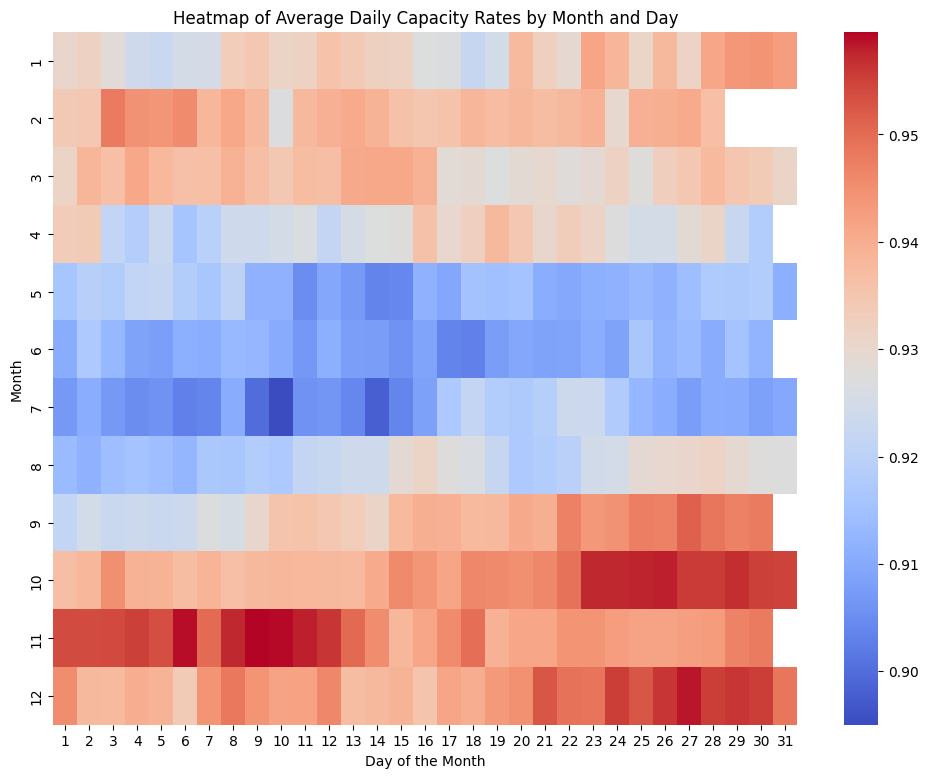

In [ ]:
# Heatmap
pivot_table = df.pivot_table(values='CAPACITY_RATE', index=[df['OCCUPANCY_DATE'].dt.month], columns=[df['OCCUPANCY_DATE'].dt.day], aggfunc=np.mean)

plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Heatmap of Average Daily Capacity Rates by Month and Day')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.show()

In [ ]:
# Group by PROGRAM_NAME and SEASON, then mean CAPACITY_RATE
average_rates = df.groupby(['PROGRAM_NAME', 'SEASON'])['CAPACITY_RATE'].mean().reset_index()

# Have PROGRAM_NAME as rows and SEASONS as columns
pivot_table = average_rates.pivot(index='PROGRAM_NAME', columns='SEASON', values='CAPACITY_RATE')

# Filter out the columns to keep only Winter and Summer
final_table = pivot_table[['Winter', 'Summer']]

print(final_table)

SEASON                                                Winter    Summer
PROGRAM_NAME                                                          
545 Lake Shore Blvd W. Couples                      0.843455  0.728736
545 Lake Shore Blvd W. Men                          0.994152  0.989703
545 Lake Shore Blvd W. Men Lower Level              0.995810  0.993877
545 Lake Shore Blvd W. Women                        0.979421  0.966690
Birkdale North York West Hotel Program - Family...  0.981447       NaN
...                                                      ...       ...
YWCA Davenport Youth Hotel Program                  0.927351  0.970691
Youth without Shelter Emergency Shelter Program     0.912181  0.678549
Youth without Shelter Stay In School Program        0.919699  0.734860
YouthLink Emergency Program                         0.975556  0.852174
YouthLink Transitional Program                      0.949808  0.838831

[167 rows x 2 columns]
